In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

def build_mic_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(32, kernel_size=16, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=4),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [39]:
model_acc = build_lstm_model((41, 3), num_classes=8)
model_gyr = build_lstm_model((41, 3), num_classes=8)
model_mag = build_lstm_model((62, 3), num_classes=8)

# #  This works, but slow and heavy, especially with large sequences.
# model_mic = build_lstm_model((3200, 1), num_classes=8)

model_mic = build_mic_model((3200, 1), num_classes=8)


c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# from tensorflow.keras.utils import to_categorical

# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split

# X_acc = np.array(Xt_acc_clean)     # shape: (7259, 41, 3)
# y_acc = to_categorical(y_acc_mapped)

# X_gyr = np.array(Xt_gyr_clean)     # shape: (7259, 41, 3)
# y_gyr = to_categorical(y_gyr_mapped)

# X_mag = np.array(Xt_mag_clean)     # shape: (7219, 62, 3)
# y_mag = to_categorical(y_mag_mapped)

# X_mic = np.array(Xt_mic_clean)      # shape: (7185, 3200, 1)
# y_mic = to_categorical(y_mic_mapped)

In [41]:
import pandas as pd

df = pd.read_pickle('./cleaned_data/electric_screwdriver_dataset_final.pkl')

In [42]:
df

,X_acc,X_gyr,X_mag,X_mic,y
0,"[[-5.877378, 1.322051, 8.612491], [-5.81989653...","[[-0.01065264, 0.01171791, -0.02130529], [-0.0...","[[0.0002260082, 5.341905e-05, -0.000693571], [...","[[7.0], [-1.0], [-9.0], [-6.0], [-9.0], [-11.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
1,"[[0.7765572746195495, -3.3777170393376266, 10....","[[0.2405253416105745, -0.1589432131596917, 0.5...","[[-0.00017548574, 0.0002208949812538, 0.000350...","[[-176.0], [-222.0], [-295.0], [-398.0], [-479...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
2,"[[-4.661880464586655, 1.9574543543611933, 8.63...","[[-0.4239807449647005, -0.1303672858574356, 0....","[[0.0002206308612263, 5.172351082169609e-05, -...","[[20.0], [19.0], [16.0], [9.0], [9.0], [12.0],...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
3,"[[-0.2243101964783376, 0.8909580531877421, 6.9...","[[0.7246870594223318, 0.0347562930971468, 0.17...","[[-0.0001836712355924, 0.000201727285763, 0.00...","[[264.0], [325.0], [218.0], [4.0], [-334.0], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
4,"[[-4.654718747731929, 1.6489709338113354, 8.58...","[[-0.7671679936250123, -0.3679601965661887, 0....","[[0.0002186657774452, 5.5124810577497975e-05, ...","[[15.0], [7.0], [-7.0], [-14.0], [-18.0], [-11...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
...,...,...,...,...,...
7172,"[[-0.4435225921488645, 1.446229573999129, 9.67...","[[1.5150272513234182, 0.2443794430437472, 0.08...","[[-0.0001829688242856, 0.0002077097255544, 0.0...","[[32.0], [33.0], [30.0], [30.0], [26.0], [17.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
7173,"[[-0.3560756462892959, -3.229175592151793, 9.6...","[[-1.704929743579738, -0.2662585630831891, 0.1...","[[-0.0001818928115718, 0.0002072522331499, 0.0...","[[-12.0], [-8.0], [-6.0], [-7.0], [-10.0], [-1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
7174,"[[-0.5858299366003309, -5.146209871058921, 9.0...","[[-1.1219787501838403, 0.1069062964748598, 0.0...","[[-0.0001823644517704, 0.0002003066688551, 0.0...","[[8.0], [25.0], [31.0], [-1.0], [-72.0], [-103...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
7175,"[[-0.144674183359998, -2.698030852888813, 9.14...","[[3.119370343340732, 0.0056913177676755, 0.446...","[[-0.0001829336829628, 0.0002016430804244, 0.0...","[[-91.0], [-93.0], [-88.0], [-54.0], [0.0], [4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"


In [68]:
import numpy as np
X_acc = np.array(df['X_acc'])
X_acc = np.stack(X_acc)

X_gyr = np.array(df['X_gyr'])
X_gyr = np.stack(X_gyr)

X_mag = np.array(df['X_mag'])
X_mag = np.stack(X_mag)

X_mic = np.array(df['X_mic'])
X_mic = np.stack(X_mic)

y = np.array(df['y'])
y = np.stack(y)

print(type(X_acc), type(X_gyr),type(X_mag),type(X_mic), type(y))
y

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert one-hot vectors to class labels
# Assumes only one '1' per vector
y_class = np.array([np.argmax(label) for label in y])


In [70]:
X_acc.shape

(7177, 41, 3)

In [71]:
from sklearn.model_selection import train_test_split

# Train/test split per sensor
X_acc_train, X_acc_test, y_acc_train, y_acc_test = train_test_split(X_acc, y, test_size=0.2, stratify=y_class, random_state=42)
X_gyr_train, X_gyr_test, y_gyr_train, y_gyr_test = train_test_split(X_gyr, y, test_size=0.2, stratify=y_class, random_state=42)
X_mag_train, X_mag_test, y_mag_train, y_mag_test = train_test_split(X_mag, y, test_size=0.2, stratify=y_class, random_state=42)
X_mic_train, X_mic_test, y_mic_train, y_mic_test = train_test_split(X_mic, y, test_size=0.2, stratify=y_class, random_state=42)

In [72]:
num_classes = len(np.unique(y_class))
model_acc = build_lstm_model((41, 3), num_classes)
model_gyr = build_lstm_model((41, 3), num_classes)
model_mag = build_lstm_model((62, 3), num_classes)
model_mic = build_mic_model((3200, 1), num_classes)

c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model_acc.fit(X_acc_train, y_acc_train, validation_data=(X_acc_test, y_acc_test), epochs=10, batch_size=32)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6074 - loss: 1.3653 - val_accuracy: 0.7570 - val_loss: 0.8721
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7588 - loss: 0.7934 - val_accuracy: 0.8294 - val_loss: 0.5294
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8333 - loss: 0.4731 - val_accuracy: 0.8524 - val_loss: 0.5020
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8567 - loss: 0.4414 - val_accuracy: 0.8921 - val_loss: 0.3537
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8751 - loss: 0.3616 - val_accuracy: 0.8962 - val_loss: 0.3340
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8787 - loss: 0.3527 - val_accuracy: 0.9011 - val_loss: 0.3201
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8895 - loss: 0.3085 - val_accuracy: 0.9053 - val_loss: 0.2924
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8917 - loss: 0.2874 - val_accu

In [75]:
model_gyr.fit(X_gyr_train, y_gyr_train, validation_data=(X_gyr_test, y_gyr_test), epochs=10, batch_size=32)
model_mag.fit(X_mag_train, y_mag_train, validation_data=(X_mag_test, y_mag_test), epochs=10, batch_size=32)
model_mic.fit(X_mic_train, y_mic_train, validation_data=(X_mic_test, y_mic_test), epochs=10, batch_size=16)  # MIC: large input → smaller batch

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6940 - loss: 1.3592 - val_accuracy: 0.7584 - val_loss: 0.8642
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7560 - loss: 0.8943 - val_accuracy: 0.7604 - val_loss: 0.8741
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7624 - loss: 0.8689 - val_accuracy: 0.7639 - val_loss: 0.8371
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7722 - loss: 0.8141 - val_accuracy: 0.7639 - val_loss: 0.8067
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7709 - loss: 0.7847 - val_accuracy: 0.7695 - val_loss: 0.8001
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7706 - loss: 0.7523 - val_accuracy: 0.7674 - val_loss: 0.7312
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7749 - loss: 0.7175 - val_accuracy: 0.7792 - val_loss: 0.6916
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7741 - loss: 0.6895 - val_accu

In [79]:
model_acc.save('./trained_models/model_acc.keras')  
model_gyr.save('./trained_models/model_gyr.keras')
model_mag.save('./trained_models/model_mag.keras')
model_mic.save('./trained_models/model_mic.keras')

In [80]:
# --- Post-training: Prediction fusion for 4 sensor models (ACC, GYR, MAG, MIC) ---

import numpy as np
from sklearn.metrics import classification_report

# --- Predict probabilities from each trained model ---
p_acc = model_acc.predict(X_acc_test)
p_gyr = model_gyr.predict(X_gyr_test)
p_mag = model_mag.predict(X_mag_test)
p_mic = model_mic.predict(X_mic_test)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step


In [81]:
y_pred_acc = [np.argmax(p_acc[i]) for i in range(len(p_acc))]
y_pred_gyr = [np.argmax(p_gyr[i]) for i in range(len(p_gyr))]
y_pred_mag = [np.argmax(p_mag[i]) for i in range(len(p_mag))]
y_pred_mic = [np.argmax(p_mic[i]) for i in range(len(p_mic))]

print(len(y_pred_acc), len(y_pred_gyr), len(y_pred_mag), len(y_pred_mic))

1436 1436 1436 1436


In [95]:
y_test_actual = np.array([np.argmax(label) for label in y_acc_test])

In [96]:
# --- Fuse using soft voting (average the probability distributions) ---
p_fused = (p_acc + p_gyr + p_mag + p_mic) / 4.0
y_pred_fused = np.argmax(p_fused, axis=1)

# y_class = np.array([np.argmax(label) for label in y])
# # # --- Use one aligned test label set for ground truth ---
# # y_true = np.argmax(y_class, axis=1)


# y_class_test = np.array([np.argmax(label) for label in y])
# # print(y_class.shape,y_pred_fused.shape)

# --- Evaluation ---
print("[INFO] Classification report from fused prediction:")
print(classification_report(y_test_actual, y_pred_fused))


[INFO] Classification report from fused prediction:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       164
           1       1.00      0.13      0.24        67
           2       1.00      0.02      0.03        60
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        14
           5       0.90      0.53      0.67        17
           6       0.88      1.00      0.93      1085
           7       0.00      0.00      0.00         3

    accuracy                           0.87      1436
   macro avg       0.58      0.32      0.34      1436
weighted avg       0.86      0.87      0.82      1436



c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [120]:
import shap
# import numpy as np

# # Ensure inputs are NumPy arrays
# Xt_acc_test = np.array(X_acc_test)

# # Sample a background for KernelExplainer
# X_background = Xt_acc_test[np.random.choice(len(Xt_acc_test), size=100, replace=False)]

# # Use kernel-based model-agnostic SHAP
# explainer = shap.KernelExplainer(model_acc.predict, X_background)

# # Explain first 5 examples
# shap_values = explainer.shap_values(Xt_acc_test[:5])

# # Visualize
# shap.summary_plot(shap_values, Xt_acc_test[:5])

In [140]:
# 3D to 2D wrapper
def f_model_flattened(X_flat):
    X = X_flat.reshape((-1, 41, 3))
    return model_acc.predict(X)

In [143]:
X_background = X_acc_test[np.random.choice(len(X_acc_test), size=1, replace=False)]
X_background_flat = X_background.reshape((X_background.shape[0], -1))  # shape: (100, 123)

explainer = shap.KernelExplainer(f_model_flattened, X_background_flat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [147]:
X_background = X_acc_test[np.random.choice(len(X_acc_test), size=1, replace=False)]
X_background_flat = X_background.reshape((X_background.shape[0], -1))  # shape: (100, 123)

shap_values = explainer.shap_values(X_background_flat)
len(shap_values)

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


1

C:\Users\gshub\AppData\Local\Temp\ipykernel_28924\2699567980.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_background_flat[:500])
c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\shap\plots\_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
c:\Uni Stuff\Semester 4\ADLTS\exAI-timeseries-tool-tracking-data\.env\Lib\site-packages\shap\plots\_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-i

<Figure size 640x480 with 0 Axes>

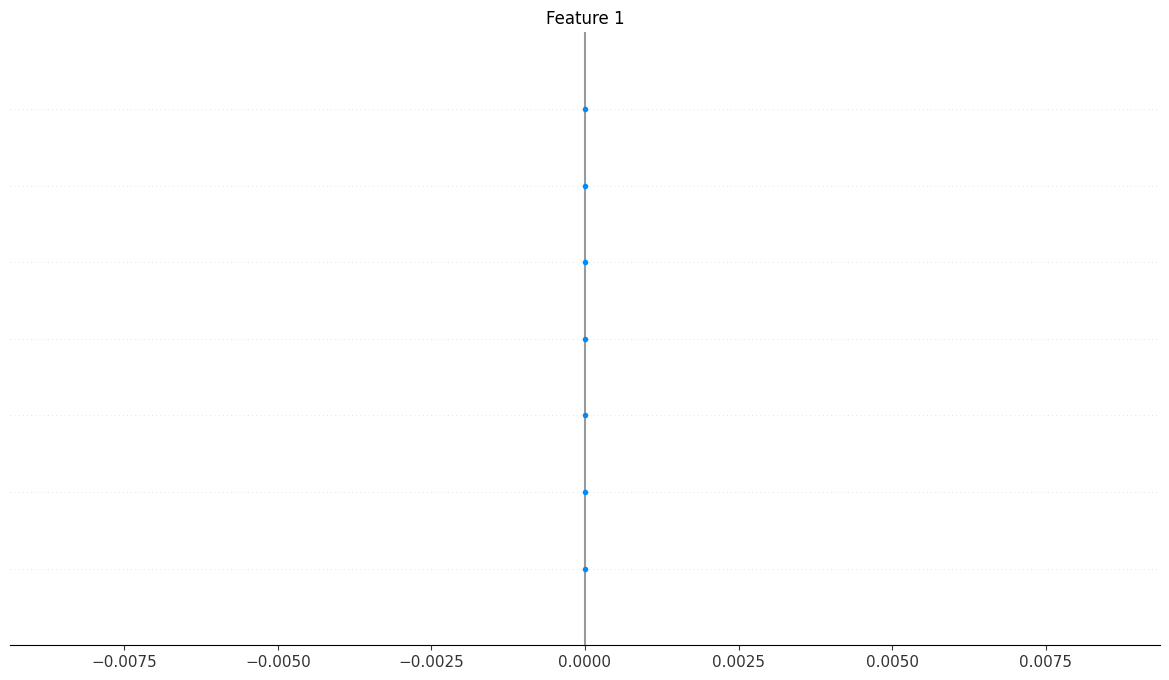

In [145]:
shap.summary_plot(shap_values, X_background_flat[:500])